# Рубежный контроль №1: Методы обработки данных

**Курс:** Методы машинного обучения
**Программа:** Магистратура, 2 семестр (Весна 2025)

**Выполнил:** Балабанов Алексей Олегович

**Группа:** *ИУ5-22М*

**Вариант:** 2

## Задание

**Вариант 2:**
1.  **Задача №2:** Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода **"target (mean) encoding"**.
2.  **Задача №22:** Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием **масштабирования по максимальному значению (MaxAbsScaler)**.

**Дополнительное требование (зависит от группы):**
*   *(Для ИУ5-22М)* Для произвольной колонки данных построить **гистограмму**.

## 1. Подготовка данных и библиотек

In [7]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler

# Настройки для лучшего отображения
pd.set_option('display.max_columns', None) # Показывать все столбцы
plt.style.use('seaborn-v0_8-darkgrid') # Стиль графиков

### Выбор и загрузка набора данных

Для выполнения заданий был выбран набор данных "Titanic" из библиотеки Seaborn. Этот набор данных содержит информацию о пассажирах Титаника и подходит для обеих задач, так как включает категориальные и числовые признаки, а также целевую переменную (выживание), необходимую для Target Encoding.

In [8]:
# Загрузка датасета
df = sns.load_dataset('titanic')

# Вывод первых 5 строк для ознакомления
print("Первые 5 строк датасета:")
display(df.head())

# Вывод информации о датасете
print("\nИнформация о датасете:")
df.info()

Первые 5 строк датасета:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 2. Задача №2: Target (Mean) Encoding

**Цель:** Закодировать категориальный признак с использованием среднего значения целевой переменной для каждой категории.

**Выбранный признак:** `embarked` (порт посадки)
**Целевая переменная:** `survived` (выжил ли пассажир: 0 = Нет, 1 = Да)

**Описание метода:** Для каждой категории признака `embarked` вычисляется среднее значение целевой переменной `survived`. Это среднее значение (которое в данном случае равно доле выживших для данной категории) затем используется в качестве нового числового представления для этой категории.

In [9]:
# Проверка и обработка пропусков в 'embarked' (если есть)
if df['embarked'].isnull().any():
    print(f"Найдены пропуски в 'embarked': {df['embarked'].isnull().sum()} шт.")
    # Заполним наиболее частым значением (модой)
    mode_embarked = df['embarked'].mode()[0]
    df['embarked'] = df['embarked'].fillna(mode_embarked)
    print(f"Пропуски заполнены значением '{mode_embarked}'.")
else:
    print("Пропусков в 'embarked' не найдено.")

# Вычисление среднего значения 'survived' для каждой категории 'embarked'
mean_target = df.groupby('embarked')['survived'].mean()
print("\nСреднее значение 'survived' для каждой категории 'embarked':")
print(mean_target)

# Создание нового столбца с закодированными значениями
df['embarked_target_encoded'] = df['embarked'].map(mean_target)

# Вывод результата
print("\nПример результата Target Encoding для 'embarked':")
display(df[['embarked', 'survived', 'embarked_target_encoded']].head(10))

Найдены пропуски в 'embarked': 2 шт.
Пропуски заполнены значением 'S'.

Среднее значение 'survived' для каждой категории 'embarked':
embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64

Пример результата Target Encoding для 'embarked':


,embarked,survived,embarked_target_encoded
0,S,0,0.339009
1,C,1,0.553571
2,S,1,0.339009
3,S,1,0.339009
4,S,0,0.339009
5,Q,0,0.389610
6,S,0,0.339009
7,S,0,0.339009
8,S,1,0.339009
9,C,1,0.553571


**Комментарий:** Теперь категориальный признак `embarked` представлен числовым признаком `embarked_target_encoded`, где каждое значение отражает средний шанс выживания для пассажиров, севших на борт в соответствующем порту.

## 3. Задача №22: Масштабирование по максимальному значению (MaxAbsScaler)

**Цель:** Масштабировать числовой признак так, чтобы максимальное абсолютное значение стало равно 1.

**Выбранный признак:** `fare` (стоимость билета)

**Описание метода:** MaxAbsScaler делит каждое значение признака на максимальное абсолютное значение в этом признаке. В результате все значения признака оказываются в диапазоне [-1, 1]. Этот метод полезен для данных, которые уже центрированы около нуля или для разреженных данных.

In [10]:
# Проверка и обработка пропусков в 'fare' (если есть)
if df['fare'].isnull().any():
    print(f"Найдены пропуски в 'fare': {df['fare'].isnull().sum()} шт.")
    # Заполним медианой
    median_fare = df['fare'].median()
    df['fare'].fillna(median_fare, inplace=True)
    print(f"Пропуски заполнены медианным значением {median_fare:.2f}.")
else:
    print("Пропусков в 'fare' не найдено.")

# Инициализация скейлера
max_abs_scaler = MaxAbsScaler()

# Применение скейлера к признаку 'fare'
df['fare_maxabs_scaled'] = max_abs_scaler.fit_transform(df[['fare']])

# Вывод описательной статистики до и после масштабирования
print("\nОписательная статистика 'fare' ДО масштабирования:")
display(df['fare'].describe())

print("\nОписательная статистика 'fare' ПОСЛЕ масштабирования MaxAbsScaler:")
display(df['fare_maxabs_scaled'].describe())

# Вывод примера результата
print("\nПример результата масштабирования для 'fare':")
display(df[['fare', 'fare_maxabs_scaled']].head(10))

Пропусков в 'fare' не найдено.

Описательная статистика 'fare' ДО масштабирования:


,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200



Описательная статистика 'fare' ПОСЛЕ масштабирования MaxAbsScaler:


,fare_maxabs_scaled
count,891.000000
mean,0.062858
std,0.096995
min,0.000000
25%,0.015440
50%,0.028213
75%,0.060508
max,1.000000



Пример результата масштабирования для 'fare':


,fare,fare_maxabs_scaled
0,7.2500,0.014151
1,71.2833,0.139136
2,7.9250,0.015469
3,53.1000,0.103644
4,8.0500,0.015713
5,8.4583,0.016510
6,51.8625,0.101229
7,21.0750,0.041136
8,11.1333,0.021731
9,30.0708,0.058694


**Комментарий:** Признак `fare` был успешно масштабирован. Максимальное значение в новом столбце `fare_maxabs_scaled` теперь равно 1, а остальные значения пропорционально уменьшились. Минимальное значение (0 в данном случае) осталось нулем.

## 4. Дополнительное задание (по группе)

*(Пожалуйста, замените этот раздел на требование для Вашей группы. Ниже приведен пример для группы ИУ5-22М: построение гистограммы.)*

### Для ИУ5-22М: Построение гистограммы

**Цель:** Построить гистограмму для произвольного числового признака для визуализации его распределения.
**Выбранный признак:** `age` (возраст пассажира)

Найдены пропуски в 'age': 177 шт.
Пропуски для гистограммы заполнены медианным значением 28.


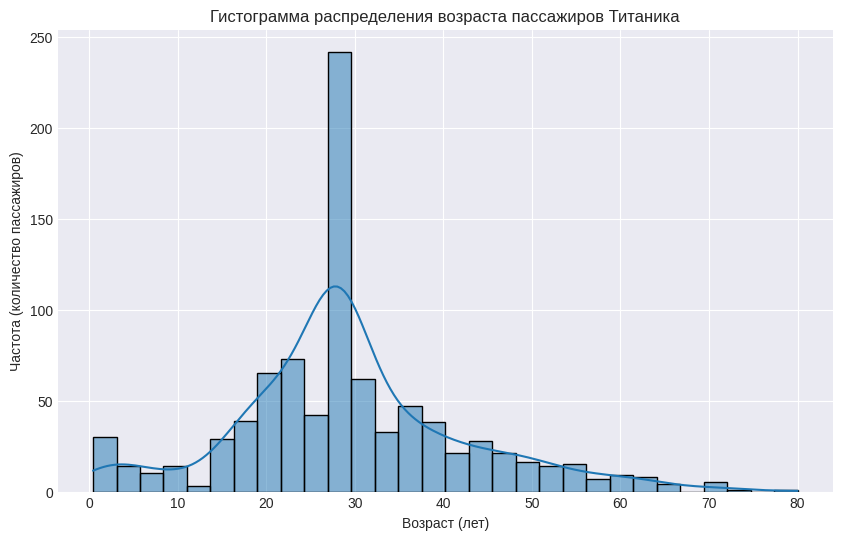

In [11]:
# Обработка пропусков в 'age' для корректного построения гистограммы
if df['age'].isnull().any():
    print(f"Найдены пропуски в 'age': {df['age'].isnull().sum()} шт.")
    median_age = df['age'].median()
    age_for_hist = df['age'].fillna(median_age).copy()
    print(f"Пропуски для гистограммы заполнены медианным значением {median_age:.0f}.")
else:
    print("Пропусков в 'age' не найдено.")
    age_for_hist = df['age'].copy()

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(age_for_hist, bins=30, kde=True) # kde=True добавляет сглаженную кривую плотности
plt.title('Гистограмма распределения возраста пассажиров Титаника')
plt.xlabel('Возраст (лет)')
plt.ylabel('Частота (количество пассажиров)')
plt.grid(True)
plt.show()

**Комментарий:** Гистограмма показывает распределение возраста пассажиров. Видно, что большинство пассажиров были молодыми людьми в возрасте от 20 до 30 лет, также присутствует заметное количество детей. Распределение имеет небольшой правый хвост (пожилые люди).

## Заключение

В рамках рубежного контроля №1 были выполнены следующие задачи для варианта №2:
1.  Проведено кодирование категориального признака `embarked` с использованием метода **Target Encoding**, что позволило представить его в числовом виде на основе связи с целевой переменной `survived`.
2.  Выполнено масштабирование числового признака `fare` с использованием **MaxAbsScaler**, приведя его значения к диапазону [0, 1] путем деления на максимальное абсолютное значение.
3.  Выполнено дополнительное задание для группы ИУ5-22М: построен график `гистограмма` для признака `age`.